### To run the cbgt network, see first the technical_testbench to install all the required packages and start the server 

In [1]:
#Auto reloading 
#%load_ext autoreload
#%autoreload 2
#%reload_ext autoreload 

In [2]:
#Removing indentation issues:
#!autopep8 --in-place --aggressive --aggressive init_params.py
#!autopep8 --in-place --aggressive --aggressive popconstruct.py
#!autopep8 --in-place --aggressive --aggressive generateepochs.py
#!autopep8 --in-place --aggressive --aggressive qvalues.py

In [3]:
!python setup.py build_ext --inplace

running build_ext
building 'agent_timestep' extension
gcc -pthread -B /home/bahuguna/anaconda3/envs/cbgt_env/compiler_compat -Wl,--sysroot=/ -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -fPIC -I/home/bahuguna/anaconda3/envs/cbgt_env/include/python3.6m -c agent_timestep.c -o build/temp.linux-x86_64-3.6/agent_timestep.o
gcc -pthread -shared -B /home/bahuguna/anaconda3/envs/cbgt_env/compiler_compat -L/home/bahuguna/anaconda3/envs/cbgt_env/lib -Wl,-rpath=/home/bahuguna/anaconda3/envs/cbgt_env/lib -Wl,--no-as-needed -Wl,--sysroot=/ build/temp.linux-x86_64-3.6/agent_timestep.o -o build/lib.linux-x86_64-3.6/agent_timestep.cpython-36m-x86_64-linux-gnu.so
copying build/lib.linux-x86_64-3.6/agent_timestep.cpython-36m-x86_64-linux-gnu.so -> 


In [4]:
#Importing scripts:
import cbgt as cbgt
from frontendhelpers import * 
from tracetype import *
import init_params as par 
import popconstruct as popconstruct
import qvalues as qval
import generateepochs as gen
from agentmatrixinit import *
#from general_init_codeblocks import *
from agent_timestep import timestep_mutator, multitimestep_mutator
import pdb
import pipeline_creation as pl_creat
import mega_loop as ml
import plotting_functions as plt_func
import matplotlib.pyplot as plt

/home/bahuguna/anaconda3/envs/cbgt_env/lib/python3.6/site-packages/ray/autoscaler/_private/cli_logger.py:61: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `pip install 'ray[default]'`. Please update your install command.
  "update your install command.", FutureWarning)
2021-10-19 14:21:19,778	INFO worker.py:727 -- Connecting to existing Ray cluster at address: 172.25.2.251:6379


# Create pipeline

### Network pipeline

In [5]:
seed = np.random.randint(0,9999999)
print(seed)
np.random.seed(seed)
to_check = np.random.randint(0,50,10)
print(to_check)

4745016
[24 45 20 42 13 21 30 48 38 10]


In [6]:
#Create the whole pipeline.
#This pipeline creates three sub-pipelines: 
#rewards pipeline (rsg), q values pipeline (q_val), network pipeline(pl)

pl = pl_creat.create_main_pipeline()
mega_l = ml.mega_loop

# Timestep loop

In [7]:
#Adding the timestep loop to the main pipeline
pl.add(mega_l)

# Running the pipeline

### 1. Default values

In [8]:
#See init_params.py / generateepochs.py / popconstruct.py / qvalues.py
#to know the parameters contained in each of the following variables 
environment = {
    'params': None, #neuron parameters (init_params.py)
    'pops': None,   #population parameters (init_params.py)
    'receps' : None, #receptor parameters (init_params.py)
    'base' : None, #baseline stimulation parameters (init_params.py)
    'dpmns' : None, #dopamine related parameters (init_params.py)
    'd1' : None, #D1-MSNs population related parameters (init_params.py)
    'd2' : None, #D2-MSNs population related parameters (init_params.py)
    'channels' : pd.DataFrame([["left"],["right"]], columns=['action']), #action channels related parameters (init_params.py)
    #'actionchannels' : pd.DataFrame([[1],[2]], columns=['action']), #labels for the actions (init_params.py)
    #'actionchannels' : pd.DataFrame([["left"],["right"]], columns=['action']), #labels for the actions (init_params.py)
    'newpathways' : None, #connectivity parameters (popconstruct.py)
    'Q_support_params': None, #initialization of Q-values update (qvalues.py) 
    'Q_df':None, #initialized Q-values df (qvalues.py)  
    'n_trials': 5, #number of trials (generateepochs.py)
    'volatility': 2, #frequency of changepoints (generateepochs.py)
    'conflict': 0.7, #probability of the preferred choice (generateepochs.py)
    'reward_mu': 1, #mean for the magnitude of the reward (generateepochs.py)
    'reward_std': 0.1, #std for the magnitude of the reward (generateepochs.py)
    'maxstim': 2.7, # 3 instead? how much stimulus the LIP gets at maximum
}


In [9]:
results = cbgt.ExecutionManager(cores=7).run([pl],[environment])

(raylet) /home/bahuguna/anaconda3/envs/cbgt_env/lib/python3.6/site-packages/ray/autoscaler/_private/cli_logger.py:61: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `pip install 'ray[default]'`. Please update your install command.
(raylet)   "update your install command.", FutureWarning)
(raylet) /home/bahuguna/anaconda3/envs/cbgt_env/lib/python3.6/site-packages/ray/autoscaler/_private/cli_logger.py:61: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `pip install 'ray[default]'`. Please update your install command.
(raylet)   "update your install command.", FutureWarning)
(raylet) /home/bahuguna/anaconda3/envs/cbgt_env/lib/python3.6/site-packages/ray/autoscaler/_private/cli_logger.py:61: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `p

(pid=31163) 2 4 0.161666`
(pid=31163) 2 4 0.161666`
(pid=31163) 3 5 0.161666`
(pid=31163) 3 5 0.161666`
(pid=31163) 10 6 1.0`
(pid=31163) 10 8 1.0`
(pid=31163) 10 6 1.0`
(pid=31163) 10 8 1.0`
(pid=31163) 10 10 0.4335`
(pid=31163) 10 12 1.0`
(pid=31163) 10 14 1.0`
(pid=31163) 10 10 0.4335`
(pid=31163) 10 12 1.0`
(pid=31163) 10 14 1.0`
(pid=31163) 10 15 0.241667`
(pid=31163) 11 7 1.0`
(pid=31163) 11 9 1.0`
(pid=31163) 10 15 0.241667`
(pid=31163) 11 7 1.0`
(pid=31163) 11 9 1.0`
(pid=31163) 11 11 0.4335`
(pid=31163) 11 13 1.0`
(pid=31163) 11 14 1.0`
(pid=31163) 11 11 0.4335`
(pid=31163) 11 13 1.0`
(pid=31163) 11 14 1.0`
(pid=31163) 11 15 0.241667`
(pid=31163) 12 6 1.0`
(pid=31163) 12 8 1.0`
(pid=31163) 11 15 0.241667`
(pid=31163) 12 6 1.0`
(pid=31163) 12 8 1.0`
(pid=31163) 12 14 0.8334`
(pid=31163) 13 7 1.0`
(pid=31163) 13 9 1.0`
(pid=31163) 13 14 0.8334`
(pid=31163) 0 12 1.0`
(pid=31163) 1 13 1.0`
(pid=31163) 4 0 1.0`
(pid=31163) 12 14 0.8334`
(pid=31163) 13 7 1.0`
(pid=31163) 13 9 1.0`
(

(pid=31163) phasetimer 223
(pid=31163) globaltimer 5514
(pid=31163) gateFRs [17.33333333 30.22222222]
(pid=31163) thresholds_crossed [1]
(pid=31163) phasetimer 223
(pid=31163) globaltimer 5514
(pid=31163) gateFRs [17.33333333 30.22222222]
(pid=31163) thresholds_crossed [1]
(pid=31163) phasetimer 301
(pid=31163) globaltimer 5815
(pid=31163)   action
(pid=31163) 0   left
(pid=31163) 1  right
(pid=31163) chosen_action right
(pid=31163) phasetimer 301
(pid=31163) globaltimer 5815
(pid=31163)   action
(pid=31163) 0   left
(pid=31163) 1  right
(pid=31163) chosen_action right


In [10]:
results[0].keys()

dict_keys(['params', 'pops', 'receps', 'base', 'dpmns', 'd1', 'd2', 'channels', 'newpathways', 'Q_support_params', 'Q_df', 'n_trials', 'volatility', 'conflict', 'reward_mu', 'reward_std', 'maxstim', 'actionchannels', 'volatile_pattern', 'cp_idx', 'cp_indicator', 'noisy_pattern', 't_epochs', 'trial_num', 'chosen_action', 'celldefaults', 'popspecific', 'receptordefaults', 'basestim', 'dpmndefaults', 'd1defaults', 'd2defaults', 'popdata', 'pathways', 'connectivity_AMPA', 'meaneff_AMPA', 'plastic_AMPA', 'connectivity_GABA', 'meaneff_GABA', 'plastic_GABA', 'connectivity_NMDA', 'meaneff_NMDA', 'plastic_NMDA', 'AMPA_con', 'AMPA_eff', 'GABA_con', 'GABA_eff', 'NMDA_con', 'NMDA_eff', 'agent', 'datatables', 'reward_val', 'popfreqs'])

In [11]:
cbgt.saveResults(results,'test',['popfreqs','popdata'])

In [12]:
results[0]['actionchannels']

,action
0,left
1,right


In [13]:
results[0]['popdata']

,name,action,N,C,Taum,RestPot,ResetPot,Threshold,RestPot_ca,Alpha_ca,...,dpmn_APRE,dpmn_APOST,dpmn_XPRE,dpmn_XPOST,dpmn_type,dpmn_alphaw,dpmn_a,dpmn_b,dpmn_c,column
0,GPi`,left`,75`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,0
1,GPi`,right`,75`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,1
2,STNE`,left`,750`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,2
3,STNE`,right`,750`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,3
4,GPeP`,left`,750`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,4
5,GPeP`,right`,750`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,nan`,5
6,D1STR`,left`,75`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,0.0`,0.0`,0.0`,0.0`,1`,18.333333333333332`,1.0`,0.1`,0.05`,6
7,D1STR`,right`,75`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,0.0`,0.0`,0.0`,0.0`,1`,18.333333333333332`,1.0`,0.1`,0.05`,7
8,D2STR`,left`,75`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,0.0`,0.0`,0.0`,0.0`,2`,-15.0`,0.5`,0.005`,0.05`,8
9,D2STR`,right`,75`,0.5`,20`,-70`,-55`,-50`,-85`,0.5`,...,0.0`,0.0`,0.0`,0.0`,2`,-15.0`,0.5`,0.005`,0.05`,9


In [14]:
results[0]['popfreqs']

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,Time (ms)
0,61.111111,69.111111,25.266667,24.866667,61.577778,63.888889,3.333333,2.000000,2.222222,2.444444,0.0,0.0,9.555556,4.444444,8.444444,0.0,0
1,61.111111,69.333333,25.533333,24.822222,61.622222,63.600000,3.555556,2.000000,2.444444,2.444444,0.0,0.0,10.000000,4.222222,8.000000,0.0,1
2,62.222222,70.000000,25.600000,24.711111,61.777778,63.688889,3.555556,2.000000,2.222222,2.222222,0.0,0.0,10.000000,4.222222,8.000000,0.0,2
3,62.000000,71.111111,25.511111,24.755556,62.333333,63.733333,3.555556,2.000000,2.000000,2.222222,0.0,0.0,10.000000,4.444444,8.000000,0.0,3
4,62.444444,71.333333,25.666667,24.955556,62.488889,63.555556,3.555556,2.000000,2.000000,2.222222,0.0,0.0,10.222222,4.666667,8.222222,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6412,70.222222,67.555556,24.488889,23.311111,60.422222,65.000000,1.333333,1.777778,2.888889,1.555556,0.0,0.0,7.111111,6.666667,8.222222,0.0,6412
6413,71.111111,67.111111,24.511111,23.333333,60.355556,64.666667,1.333333,2.000000,2.888889,1.555556,0.0,0.0,7.111111,6.666667,8.222222,0.0,6413
6414,70.666667,68.000000,24.755556,23.311111,59.888889,64.866667,1.333333,2.000000,2.888889,1.555556,0.0,0.0,7.111111,6.666667,8.444444,0.0,6414
6415,70.666667,68.000000,24.955556,23.355556,60.000000,65.155556,1.333333,2.000000,2.888889,1.555556,0.0,0.0,7.111111,6.222222,8.222222,0.0,6415


In [15]:
results[0] = plt_func.rename_columns(results[0])
results[0]['popfreqs']

,GPi_left,GPi_right,STNE_left,STNE_right,GPeP_left,GPeP_right,D1STR_left,D1STR_right,D2STR_left,D2STR_right,Cx_left,Cx_right,Th_left,Th_right,FSI_common,CxI_common,Time (ms)
0,61.111111,69.111111,25.266667,24.866667,61.577778,63.888889,3.333333,2.000000,2.222222,2.444444,0.0,0.0,9.555556,4.444444,8.444444,0.0,0
1,61.111111,69.333333,25.533333,24.822222,61.622222,63.600000,3.555556,2.000000,2.444444,2.444444,0.0,0.0,10.000000,4.222222,8.000000,0.0,1
2,62.222222,70.000000,25.600000,24.711111,61.777778,63.688889,3.555556,2.000000,2.222222,2.222222,0.0,0.0,10.000000,4.222222,8.000000,0.0,2
3,62.000000,71.111111,25.511111,24.755556,62.333333,63.733333,3.555556,2.000000,2.000000,2.222222,0.0,0.0,10.000000,4.444444,8.000000,0.0,3
4,62.444444,71.333333,25.666667,24.955556,62.488889,63.555556,3.555556,2.000000,2.000000,2.222222,0.0,0.0,10.222222,4.666667,8.222222,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6412,70.222222,67.555556,24.488889,23.311111,60.422222,65.000000,1.333333,1.777778,2.888889,1.555556,0.0,0.0,7.111111,6.666667,8.222222,0.0,6412
6413,71.111111,67.111111,24.511111,23.333333,60.355556,64.666667,1.333333,2.000000,2.888889,1.555556,0.0,0.0,7.111111,6.666667,8.222222,0.0,6413
6414,70.666667,68.000000,24.755556,23.311111,59.888889,64.866667,1.333333,2.000000,2.888889,1.555556,0.0,0.0,7.111111,6.666667,8.444444,0.0,6414
6415,70.666667,68.000000,24.955556,23.355556,60.000000,65.155556,1.333333,2.000000,2.888889,1.555556,0.0,0.0,7.111111,6.222222,8.222222,0.0,6415


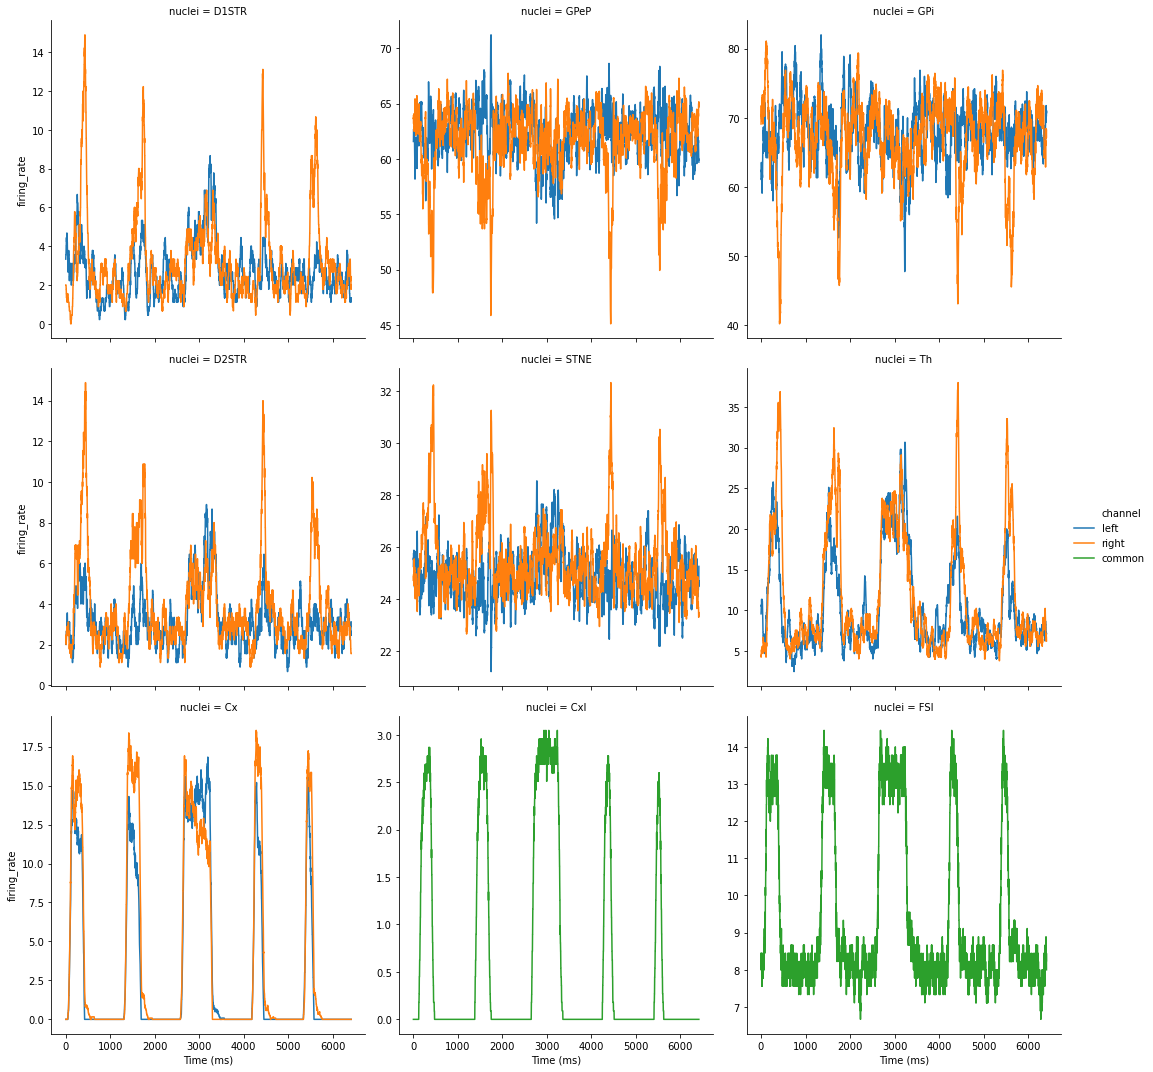

In [16]:
# You can smoothen the FR by sending smooth=True, default: smooth=False
#plt_func.plot_fr(results[0],smooth=True)
plt_func.plot_fr(results[0])
plt.show()

In [53]:
results[0]['meaneff_GABA']

,GPi,GPi,STNE,STNE,GPeP,GPeP,D1STR,D1STR,D2STR,D2STR,LIP,LIP,Th,Th,FSI,LIPI
GPi,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.3315`,0.0`,0.0`,0.0`
GPi,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.3315`,0.0`,0.0`
STNE,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`
STNE,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`
GPeP,0.06`,0.0`,0.35`,0.0`,1.75`,1.75`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`
GPeP,0.0`,0.06`,0.0`,0.35`,1.75`,1.75`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`
D1STR,2.09`,0.0`,0.0`,0.0`,0.0`,0.0`,0.28`,0.0`,0.28`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`
D1STR,0.0`,2.09`,0.0`,0.0`,0.0`,0.0`,0.0`,0.28`,0.0`,0.28`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`
D2STR,0.0`,0.0`,0.0`,0.0`,4.07`,0.0`,0.28`,0.0`,0.28`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`
D2STR,0.0`,0.0`,0.0`,0.0`,0.0`,4.07`,0.0`,0.28`,0.0`,0.28`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`


In [54]:
pd.DataFrame(
    [
        ['LIP', 'D1STR', 'AMPA', 'syn', 1, 0.027, True],#
        ['LIP', 'D1STR', 'NMDA', 'syn', 1, 0.027, False],#
        ['LIP', 'D2STR', 'AMPA', 'syn', 1, 0.027, True],#
        ['LIP', 'D2STR', 'NMDA', 'syn', 1, 0.027, False],#
        ['LIP', 'FSI', 'AMPA', 'all', 1, 0.198, False],#
        ['LIP', 'Th', 'AMPA', 'syn', 1, 0.035, False],#
        ['LIP', 'Th', 'NMDA', 'syn', 1, 0.035, False],#

        ['D1STR', 'D1STR', 'GABA', 'syn', 0.45, 0.28, False],#
        ['D1STR', 'D2STR', 'GABA', 'syn', 0.45, 0.28, False],#
        ['D1STR', 'GPi', 'GABA', 'syn', 1, 2.09, False],#

        ['D2STR', 'D2STR', 'GABA', 'syn', 0.45, 0.28, False],#
        ['D2STR', 'D1STR', 'GABA', 'syn', 0.5, 0.28, False],#
        ['D2STR', 'GPeP', 'GABA', 'syn', 1, 4.07, False],#


        ['FSI', 'FSI', 'GABA', 'all', 1, 3.25833, False],#
        ['FSI', 'D1STR', 'GABA', 'all', 1, 1.77760, False],#
        ['FSI', 'D2STR', 'GABA', 'all', 1, 1.66987, False],#

        ['GPeP', 'GPeP', 'GABA', 'all', 0.0667, 1.75, False],#
        ['GPeP', 'STNE', 'GABA', 'syn', 0.0667, 0.35, False],#
        ['GPeP', 'GPi', 'GABA', 'syn', 1, 0.06, False],#

        ['STNE', 'GPeP', 'AMPA', 'syn', 0.161666, 0.07, False],#
        ['STNE', 'GPeP', 'NMDA', 'syn', 0.161666, 1.51, False],#
        ['STNE', 'GPi', 'NMDA', 'all', 1, 0.0380, False],#

        ['GPi', 'Th', 'GABA', 'syn', 1, 0.3315, False],#

        ['Th', 'D1STR', 'AMPA', 'syn', 1, 0.3825, False],#
        ['Th', 'D2STR', 'AMPA', 'syn', 1, 0.3825, False],#
        ['Th', 'FSI', 'AMPA', 'all', 0.8334, 0.1, False],#
        ['Th', 'LIP', 'NMDA', 'all', 0.8334, 0.03, False],#

        # ramping ctx

        ['LIP', 'LIP', 'AMPA', 'syn', 0.4335, 0.0127, False],#
        ['LIP', 'LIP', 'NMDA', 'syn', 0.4335, 0.15, False],#
        ['LIP', 'LIPI', 'AMPA', 'all', 0.241667, 0.113, False],#
        ['LIP', 'LIPI', 'NMDA', 'all', 0.241667, 0.525, False],#

        ['LIPI', 'LIP', 'GABA', 'all', 1, 1.75, False],#
        ['LIPI', 'LIPI', 'GABA', 'all', 1, 3.58333, False],#

        ['Th', 'LIPI', 'NMDA', 'all', 0.8334, 0.015, False],#

    ],
    columns=['src', 'dest', 'receptor', 'type', 'con', 'eff', 'plastic']
)

,src,dest,receptor,type,con,eff,plastic
0,LIP,D1STR,AMPA,syn,1.000000,0.02700,True
1,LIP,D1STR,NMDA,syn,1.000000,0.02700,False
2,LIP,D2STR,AMPA,syn,1.000000,0.02700,True
3,LIP,D2STR,NMDA,syn,1.000000,0.02700,False
4,LIP,FSI,AMPA,all,1.000000,0.19800,False
5,LIP,Th,AMPA,syn,1.000000,0.03500,False
6,LIP,Th,NMDA,syn,1.000000,0.03500,False
7,D1STR,D1STR,GABA,syn,0.450000,0.28000,False
8,D1STR,D2STR,GABA,syn,0.450000,0.28000,False
9,D1STR,GPi,GABA,syn,1.000000,2.09000,False


In [55]:
results[0]['agent'].AMPA_eff

[[None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 [None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 [None,
  None,
  None,
  None,
  array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.07],
         [0.  , 0.  , 0.  , ..., 0.  , 0.07, 0.  ],
         ...,
         [0.  , 0.07, 0.  , ..., 0.  , 0.07, 0.07],
         [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.07],
         [0.  , 0.07, 0.07, ..., 0.  , 0.  , 0.  ]]),
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 [None,
  None,
  None,
  None,
  None,
  array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
         [0.07, 0.07, 0.  , ..., 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.07, ..., 0.07, 0.  , 0.  ],
         ...,
         [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , ...

In [56]:
savedresults = cbgt.loadResults('test')
savedresults[0]['popfreqs']

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,Time (ms)
0,78.666667,74.666667,22.666667,24.666667,59.333333,68.666667,1.333333,0.000000,4.000000,0.000000,0.0,0.0,4.000000,2.666667,5.333333,0.0,0
1,81.333333,77.333333,21.866667,23.866667,57.200000,68.533333,1.333333,1.333333,4.000000,1.333333,0.0,0.0,4.000000,2.666667,6.666667,0.0,1
2,80.000000,74.666667,22.266667,22.800000,55.333333,67.733333,1.333333,1.333333,4.000000,1.333333,0.0,0.0,1.333333,2.666667,6.666667,0.0,2
3,78.666667,72.000000,23.333333,22.266667,53.466667,67.466667,1.333333,1.333333,5.333333,1.333333,0.0,0.0,2.666667,4.000000,9.333333,0.0,3
4,74.666667,68.000000,25.066667,23.066667,53.333333,68.933333,1.333333,1.333333,4.000000,1.333333,0.0,0.0,2.666667,2.666667,9.333333,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5552,78.666667,86.666667,26.266667,25.733333,59.866667,60.133333,0.000000,0.000000,4.000000,4.000000,0.0,0.0,9.333333,4.000000,6.666667,0.0,5552
5553,78.666667,93.333333,27.333333,25.866667,59.200000,59.600000,0.000000,1.333333,4.000000,4.000000,0.0,0.0,10.666667,4.000000,5.333333,0.0,5553
5554,85.333333,86.666667,27.866667,25.066667,60.000000,62.133333,0.000000,2.666667,2.666667,2.666667,0.0,0.0,10.666667,4.000000,8.000000,0.0,5554
5555,84.000000,86.666667,27.466667,23.866667,62.266667,64.533333,0.000000,2.666667,1.333333,1.333333,0.0,0.0,6.666667,2.666667,6.666667,0.0,5555


In [57]:
t_epochs = cbgt.collateVariable(results,'t_epochs')
t_epochs

[       left     right
 0  0.000000  0.994154
 1  1.116553  0.000000
 2  0.000000  0.908484
 3  1.115428  0.000000
 4  1.030412  0.000000]

In [58]:
# LLLLLLLLLLLLLLLLLLRRRRRRRRRRRRRRRRRRRRRRLLLLLLLLLLLLLLLLLLLLLLLLLRRRRRRRRRRRRRRRRR

# LLLRLLLRLLLRRLLLLLRRRRRRLLRRRRLLRRRLRRRRLLLLLRLLRLLLLLRLLLLRLLLLLRRRRRRRRRRRRRRRRR

# LLLLLLLLLLLLLLLLLLRRRRRRRRRRRRRRRRRRRRRRLLLLLLLLLLLLLLLLLLLLLLLLLRRRRRRRRRRRRRRRRR

In [59]:
Q_df = cbgt.collateVariable(results,'Q_df')
Q_df[0]

,left,right
0,0.500000,0.500000
0,0.275000,0.500000
0,0.653699,0.500000
0,0.653699,0.683818
0,0.653699,0.376100
0,0.653699,0.206855


In [60]:
datatables = cbgt.collateVariable(results,'datatables')

In [61]:
datatables[0]

,decision,stimulusstarttime,decisiontime,decisionduration,decisiondurationplusdelay,rewardtime,correctdecision,reward
0,left,0,211,211,512,512,None,0.0
1,left,1113,1242,129,430,1543,None,1.0
2,right,2144,2386,242,543,2687,None,1.0
3,right,3288,3501,213,514,3802,None,0.0
4,right,4403,4654,251,552,4955,None,0.0


  variable  Trials  value      data_type
0    right       0      1  chosen action
1     left       1      0  chosen action
2     left       2      0  chosen action
3     left       3      0  chosen action
4    right       4      1  chosen action


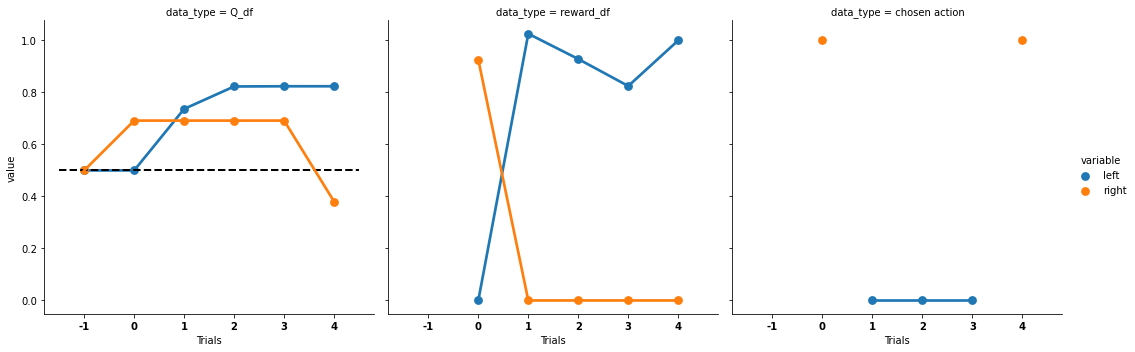

In [23]:
# Plot reward and q values and chosen actions data frames
plt_func.plot_reward_and_Q_df(t_epochs[0],Q_df[0],datatables[0])


In [ ]:
cbgt.comparisonTable(results, ['n_trials','volatility','conflict'])

In [ ]:
popfreqs = cbgt.collateVariable(results,'popfreqs')

In [ ]:
popdata = cbgt.collateVariable(results,'popdata')

In [ ]:
popdata[0][popdata[0]['name'] == 'LIP']['column']

In [ ]:
plt.plot(popfreqs[0].iloc[:,7])
plt.plot(popfreqs[0].iloc[:,8])
plt.show()

### 2. Modifying default values 

### 2.1 Modifying values 

In [ ]:
environment = {
    'params': pd.DataFrame([[8, 30]], columns=['N', 'C']),
    'pops' : {'FSI': {'Taum': [60]}}, 
    'receps' : pd.DataFrame([[100, 100]], columns=['Tau_AMPA', 'Tau_GABA']), 
    'base' : {'FSI': {'FreqExt_AMPA': [100]}}, 
    'dpmns' : pd.DataFrame([[400, 100]], columns=['dpmn_wmax', 'dpmn_tauDOP']),
    'd1' : pd.DataFrame([[3, 50]], columns=['dpmn_type', 'dpmn_c']),
    'd2' : pd.DataFrame([[3, 50]], columns=['dpmn_type', 'dpmn_c']),
    'channels' : pd.DataFrame([["left"],["right"]], columns=['action']), #action channels related parameters (init_params.py)
    #'actionchannels' : pd.DataFrame([[1],[2]], columns=['action']), 
    'newpathways' : pd.DataFrame([['LIP', 'D1STR', 'AMPA', 'syn', 700, 0.027]], columns=['src', 'dest', 'receptor', 'type', 'con', 'eff']), 
    'Q_support_params': None,
    'Q_df':None,
    'n_trials': 5,
    'volatility': 2,
    'conflict': 0.7,
    'reward_mu': 1,
    'reward_std': 0.1,
}
results = cbgt.ExecutionManager(cores=7).run(pl,environment) 

In [ ]:
results['popdata']

In [ ]:
results['Q_df']

### 2.2 Modifying a subset of values

In [ ]:
environment = {
    'params': pd.DataFrame([[4, 1]], columns=['N', 'C']), 
    'pops': None,
    'receps' : None, 
    'base' : None,
    'dpmns' : None,
    'd1' : None,
    'd2' : None,
    'channels' : pd.DataFrame([["left"],["right"]], columns=['action']), #action channels related parameters (init_params.py)
    #'actionchannels' : pd.DataFrame([[1],[2]], columns=['action']), 
    'newpathways' : None, 
    'Q_support_params': None,
    'Q_df':None,
    'n_trials': 5,
    'volatility': 2,
    'conflict': 0.7,
    'reward_mu': 1,
    'reward_std': 0.1,
}

results = cbgt.ExecutionManager(cores=7).run(pl,environment) 

In [ ]:
results['popdata']

In [ ]:
results['Q_df']

### 3. Back to default values 

In [ ]:
#See init_params.py / generateepochs.py / popconstruct.py / qvalues.py
#to know the parameters contained in each of the following variables 
environment = {
    'params': None, #neuron parameters (init_params.py)
    'pops': None,   #population parameters (init_params.py)
    'receps' : None, #receptor parameters (init_params.py)
    'base' : None, #baseline stimulation parameters (init_params.py)
    'dpmns' : None, #dopamine related parameters (init_params.py)
    'd1' : None, #D1-MSNs population related parameters (init_params.py)
    'd2' : None, #D2-MSNs population related parameters (init_params.py)
    'channels' : pd.DataFrame([["left"],["right"]], columns=['action']), #action channels related parameters (init_params.py)
    #'actionchannels' : pd.DataFrame([[1],[2]], columns=['action']), #labels for the actions (init_params.py)
    'newpathways' : None, #connectivity parameters (popconstruct.py)
    'Q_support_params': None, #initialization of Q-values update (qvalues.py) 
    'Q_df':None, #initialized Q-values df (qvalues.py)  
    'n_trials': 5, #number of trials (generateepochs.py)
    'volatility': 2, #frequency of changepoints (generateepochs.py)
    'conflict': 0.7, #probability of the preferred choice (generateepochs.py)
    'reward_mu': 1, #mean for the magnitude of the reward (generateepochs.py)
    'reward_std': 0.1, #std for the magnitude of the reward (generateepochs.py)
}
results = cbgt.ExecutionManager(cores=7).run(pl,environment) 

In [ ]:
results['popdata']

In [ ]:
results['Q_df']

In [ ]:
#?

In [ ]:
dev = cbgt.Pipeline()

In [ ]:
dev.add(codeblock_agent_phase0)

In [ ]:
output = cbgt.ExecutionManager(cores=7).run(dev,results) 